In [21]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())



In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [4]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/bromeliad/ \
/Users/earl/Desktop/Demeter')

256

In [5]:
thefile = open('p04_models_list.txt', 'r')
lines = thefile.readlines()

In [7]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'


hist_data_path = '/Users/earl/Desktop/Demeter/historical/'
hist_tos_path = hist_data_path + 'mon/ocean/r1i1p1/tos/latest/'
hist_tauuo_path = hist_data_path + 'mon/ocean/r1i1p1/tauuo/latest/'
hist_tos_list = sorted(os.listdir(hist_tos_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))
#print(hist_models_list)


rcp85_data_path = '/Users/earl/Desktop/Demeter/rcp85/'
rcp85_tos_path = rcp85_data_path + 'mon/ocean/r1i1p1/tos/latest/'
rcp85_tauuo_path = rcp85_data_path + 'mon/ocean/r1i1p1/tauuo/latest/'
rcp85_tos_list = sorted(os.listdir(rcp85_tos_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))
#print(rcp85_models_list)


p06_plot_scatter_areas


In [27]:
tos_hist = {}
tos_rcp85 = {}
tos_anom = {}
lat = {}
lon = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}

good_lines = []
for model_list in lines:
    model = model_list[:-1]
    good_lines.append(model)
    
    tos_hist_data = xr.open_dataset(hist_tos_path + model + '_1981-2000mean.nc')
    tos_rcp85_data = xr.open_dataset(rcp85_tos_path + model + '_2081-2100mean.nc')
    tos_hist[model] = tos_hist_data['tos'][0,:,:]
    tos_rcp85[model] = tos_rcp85_data['tos'][0,:,:]
    tos_anom[model] = tos_rcp85[model]-tos_hist[model]
    
    
    tauuo_hist_data = xr.open_dataset(hist_tauuo_path + model + '_1981-2000mean.nc')
    tauuo_rcp85_data = xr.open_dataset(rcp85_tauuo_path + model + '_2081-2100mean.nc')
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]
    tauuo_anom[model] = tauuo_rcp85[model]-tauuo_hist[model]
    
    
    if len(tos_hist_data['lat'].shape) is 2:
        lat[model] = tos_hist_data['lat'][:,0]
        lon[model] = tos_hist_data['lon'][0,:]
        print(model + ' OK!')
        
    else:
        lat[model] = tos_hist_data['lat'][:]
        lon[model] = tos_hist_data['lon'][:]
        print(model + ' OK!')
        
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M']:
        lon[model][0:100] += 360
        
print(len(lines))

ACCESS1-0 OK!
ACCESS1-3 OK!
CESM1-BGC OK!
CESM1-CAM5 OK!
CMCC-CMS OK!
CMCC-CM OK!
CNRM-CM5 OK!
CSIRO-Mk3-6-0 OK!
CanESM2 OK!
FGOALS-s2 OK!
FIO-ESM OK!
GFDL-CM3 OK!
GFDL-ESM2G OK!
GFDL-ESM2M OK!
HadGEM2-AO OK!
IPSL-CM5A-LR OK!
IPSL-CM5A-MR OK!
IPSL-CM5B-LR OK!
MIROC-ESM-CHEM OK!
MIROC-ESM OK!
MRI-CGCM3 OK!
MRI-ESM1 OK!
NorESM1-ME OK!
NorESM1-M OK!
24


['ACCESS1-0', 'ACCESS1-3', 'CESM1-BGC', 'CESM1-CAM5', 'CMCC-CMS', 'CMCC-CM', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'FIO-ESM', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-ME', 'NorESM1-M']


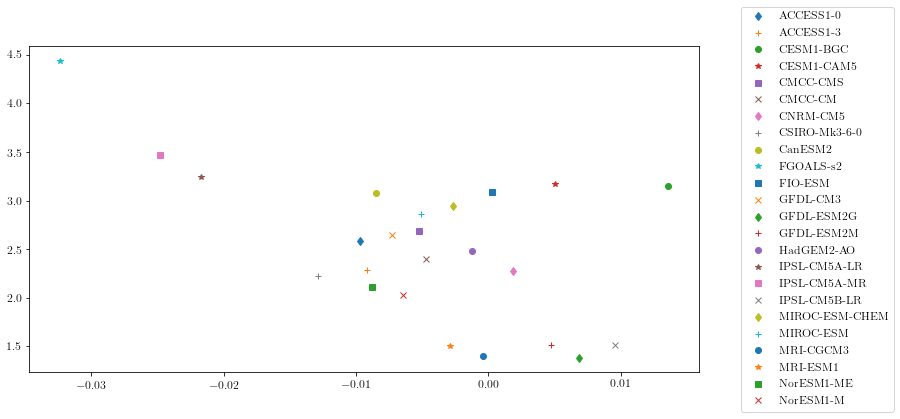

In [49]:
matplotlib.rcParams.update({'font.size': 12}) 
row = 1
col = 1
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(12, 6)

tos_anom_mean = {}
tauuo_anom_mean = {}

lat_N = -30
lat_S = -45
lon_W = 115
lon_E = 152.5
area_name = 'lat' + str(lat_N) + str(lat_S) + 'lon' + str(lon_W) + str(lon_E)

tos_anom_mean_now = []
tauuo_anom_mean_now = []

marker = itertools.cycle(('d', '+', 'o', '*', 's', 'x')) 

ax = fig.add_subplot(row, col, 1)

for idx, t_list in enumerate(lines):
    t = t_list[:-1]
    
    lat_N_idx = find_nearest_index(lat[t], lat_N)
    lat_S_idx = find_nearest_index(lat[t], lat_S)
    lon_W_idx = find_nearest_index(lon[t], lon_W)
    lon_E_idx = find_nearest_index(lon[t], lon_E)
    
    tos_anom_mean_now_model = np.mean(tos_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx])
    tauuo_anom_mean_now_model = np.mean(tauuo_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx])
    
    plt.plot(tauuo_anom_mean_now_model,tos_anom_mean_now_model, marker = next(marker), linestyle='')

    tos_anom_mean_now.append(tos_anom_mean_now_model)
    tauuo_anom_mean_now.append(tauuo_anom_mean_now_model)

print(good_lines)
    
plt.legend(good_lines, loc='center right', bbox_to_anchor=(1.3, 0.5))
tos_anom_mean[area_name] = tos_anom_mean_now
tauuo_anom_mean[area_name] = tauuo_anom_mean_now


In [15]:
np.mean(tos_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx])

<xarray.DataArray 'tos' ()>
array(2.3805246353149414, dtype=float32)

In [ ]:
output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)

plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + str(t) + '.png', bbox_inches='tight', dpi=200)